    To day i want to code self attention in Simple way 

##### First we Learn How to Design the entire self attention as toy Just to learn the fundmentals 

    1.small tensors
    2.qkv as tensors defined 
    3.compute attention score 
    4.compute softmax to normalize the data preventing more computational workload : this step is called -- Stabilizing the model -- 
    5.compute the context vector : this is where we get the meaning of our data how it realy has meaning each  single word in the sentence to the whole sentence words 

In [40]:
import torch

# 1. Our "Toy" Inputs (3 words, each represented by 3 numbers)

inputs = torch.tensor([
  [1.0, 0.5, 0.2], # Word 1
  [0.1, 0.2, 0.3], # Word 2
  [0.4, 0.9, 0.1]  # Word 3
])

# 2. Step 1: Calculate "Similarity" (Dot Product)
# Let's see how much Word 2 (query) relates to all words (keys)


query = inputs[1]
scores = inputs @ query # This is just simple multiplication and adding!

print("the score of the word 2 is :",scores)

# 3. Step 2: Normalize (Softmax)
# We turn those scores into percentages that sum to 100% (1.0)


weights = torch.softmax(scores, dim=0)



# 3. The Context Vector (The Mixing)
# We multiply each word by its weight and add them up
# context_vector = (weights[0] * inputs[0]) + (weights[1] * inputs[1]) + (weights[2] * inputs[2])



# this is Standard way to write 
context_vector = weights @ inputs

print(f"Importance weights for Word 2: {weights}")
print(f"New representation for Word 2: {context_vector}")

the score of the word 2 is : tensor([0.2600, 0.1400, 0.2500])
Importance weights for Word 2: tensor([0.3476, 0.3083, 0.3441])
New representation for Word 2: tensor([0.5161, 0.5452, 0.1964])


In [41]:

k=torch.sum(torch.tensor([0.3476, 0.3083, 0.3441]))
print( k )

tensor(1.)


    Alittle Bit Strange way --->  close to the standard way 

In [50]:
import torch
import torch.nn as nn

# --- STEP 1: RAW DATA (The "Ingredients") ---
# 3 words, each has a vector size of 3
inputs = torch.tensor([
    [1.0, 0.5, 0.2], # Word 1: 
    [0.1, 0.2, 0.3], # Word 2: 
    [0.4, 0.9, 0.1]  # Word 3: 
])



# --- STEP 2: THE LEARNABLE TOOLS (The "Knobs") ---
# We create 3 matrices. These start random but "learn" during training.
# We use size (3, 3) because our input is 3 and we want our Q,K,V to be 3.
W_query = nn.Parameter(torch.randn(3, 3))
W_key   = nn.Parameter(torch.randn(3, 3))
W_value = nn.Parameter(torch.randn(3, 3))

# --- STEP 3: TRANSFORMING (Raw -> Q, K, V) ---
# We don't use the raw inputs for math anymore. We use their "pro" versions.
queries = inputs @ W_query  # What each word is looking for
keys    = inputs @ W_key    # What each word represents
values  = inputs @ W_value  # The actual information to share

# --- STEP 4: SCORING (The "Search") ---
# Every word (Query) looks at every other word (Key)
attn_scores = queries @ keys.T 

# --- STEP 5: NORMALIZING (The "Percentages") ---
# Turn scores into weights that sum to 1.0 (100%)
# dim=-1 means do it for each row (each word's own attention)
attn_weights = torch.softmax(attn_scores, dim=-1)

# --- STEP 6: CONTEXT VECTORS (The "Final Blend") ---
# Multiply the weights by the values to get the enriched words
context_vectors = attn_weights @ values

print("Attention Weights (How much each word cares about the others):")
print(attn_weights)
print("\nFinal Context Vectors (The new 'enriched' versions of our words):")
print(context_vectors)

Attention Weights (How much each word cares about the others):
tensor([[0.5071, 0.3747, 0.1182],
        [0.4201, 0.2880, 0.2919],
        [0.5072, 0.3164, 0.1763]], grad_fn=<SoftmaxBackward0>)

Final Context Vectors (The new 'enriched' versions of our words):
tensor([[ 0.4657,  0.9479, -0.2187],
        [ 0.8269,  0.9540, -0.1880],
        [ 0.5787,  0.9672, -0.2099]], grad_fn=<MmBackward0>)


In [43]:
k=torch.sum(torch.tensor([0.0559, 0.0685, 0.8756]))

In [44]:
k

tensor(1.)

    ---------------------

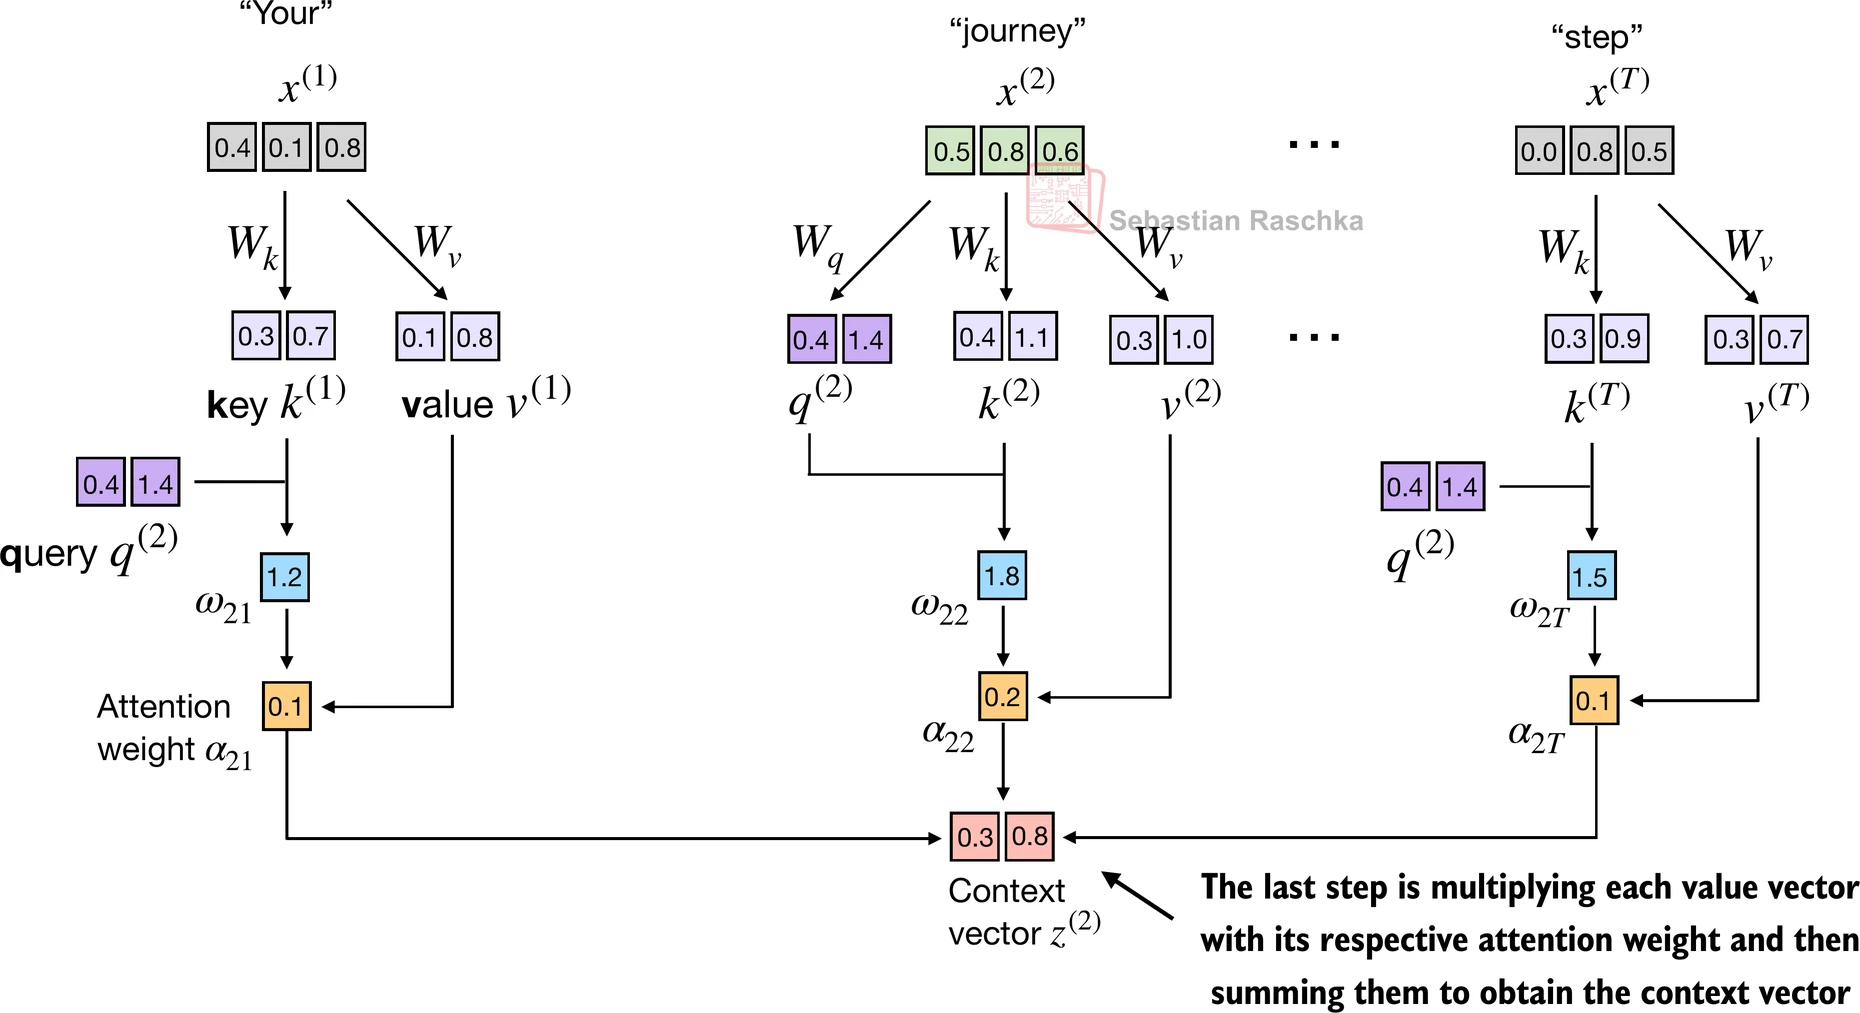

In [52]:
inputs = torch.tensor([
    [1.0, 0.5, 0.2], # Word 1: 
    [0.1, 0.2, 0.3], # Word 2: 
    [0.4, 0.9, 0.1]  # Word 3: 
])

    MATH Mode


In [ ]:



class self_attention(nn.Module):
    def __init__(self,d_in, d_out):  
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in,d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))

    def forward (self,x):
        keys= x @ self.W_key
        queries = x@ self.W_query
        values =x @ self.W_value

        Att_score = queries @ keys.T
        Att_weight = torch.softmax(
            Att_score/keys.shape[-1] ** 0.5 , dim=-1

        )

        Context = Att_weight @ values
        return Context




first_self_atten = self_attention(d_in, d_out)

print(first_self_atten(inputs))
print(first_self_atten(inputs).shape)

print("----------------------")

print(queries.shape)
print(keys.shape)
print(values.shape)


print ("hada fiiri ------------------------------------------------ ")



print(context.shape)





tensor([[0.1556, 0.3275],
        [0.1517, 0.3107],
        [0.1538, 0.3196]], grad_fn=<MmBackward0>)
torch.Size([3, 2])
----------------------
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
hada fiiri ------------------------------------------------ 
torch.Size([3, 2])


Pytorch Mode the easy and standard way 

In [77]:
inputs = torch.tensor([
    [1.0, 0.5, 0.2], # Word 1: 
    [0.1, 0.2, 0.3], # Word 2: 
    [0.4, 0.9, 0.1]  # Word 3: 
])



class SelfAttention_v2(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values
        return context_vec

torch.manual_seed(789)
self_att = SelfAttention_v2(d_in, d_out)
print(self_att(inputs))

tensor([[0.0160, 0.1801],
        [0.0137, 0.1766],
        [0.0153, 0.1789]], grad_fn=<MmBackward0>)


    Casual attention : 
    Hiding future words with causal attention this is when the model is Generating something to not see future words <----- GOAL ------<    --->    TO not cheat and acces future words when its generating the next word

    In this section, we are converting the previous self-attention mechanism into a causal self-attention mechanism

    A token is allowed to look at itself and the past

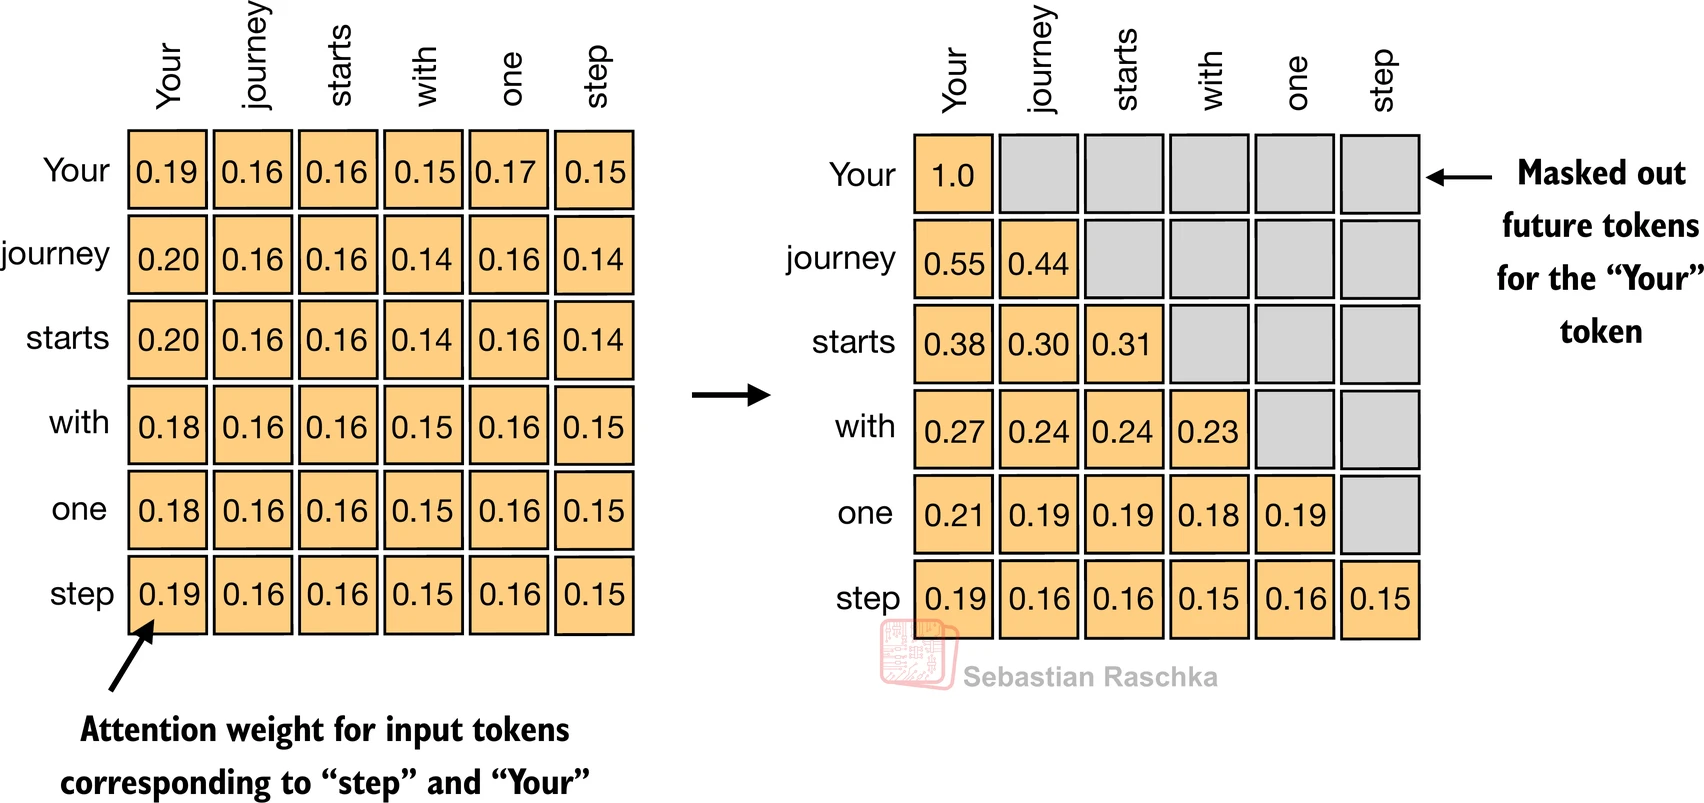

In [87]:
# Reuse the query and key weight matrices of the
# SelfAttention_v2 object from the previous section for convenience


queries = self_att.W_query(inputs)
context_length = attn_scores.shape[0]
keys = self_att.W_key(inputs) 
attn_scores = queries @ keys.T
context_length = attn_scores.shape[0]

print(attn_scores)

tensor([[ 0.1477,  0.0767, -0.0825],
        [ 0.0624,  0.0254, -0.0433],
        [ 0.1355,  0.0803, -0.0637]], grad_fn=<MmBackward0>)


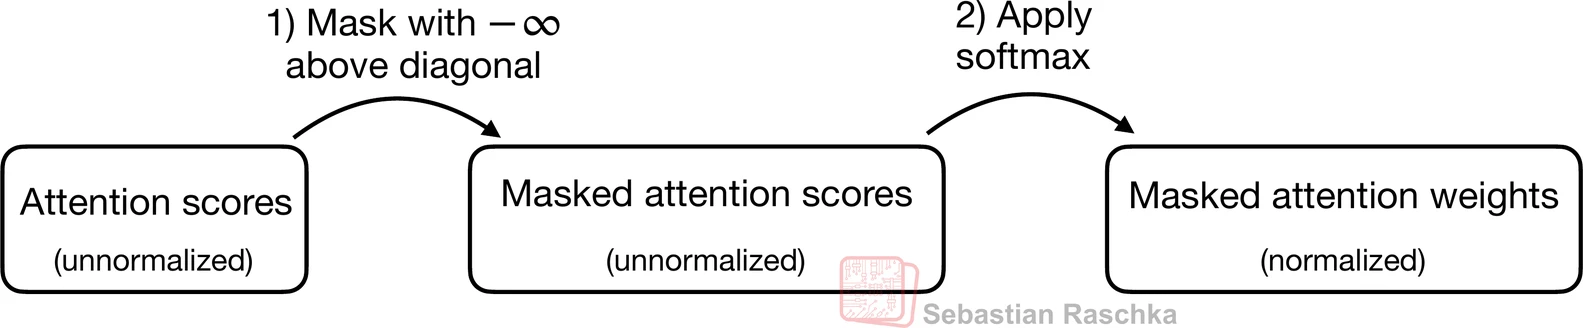

In [88]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[ 0.1477,    -inf,    -inf],
        [ 0.0624,  0.0254,    -inf],
        [ 0.1355,  0.0803, -0.0637]], grad_fn=<MaskedFillBackward0>)


In [89]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000],
        [0.5065, 0.4935, 0.0000],
        [0.3533, 0.3398, 0.3069]], grad_fn=<SoftmaxBackward0>)


## Self Attention With Casual Attention

In [92]:
# One sentence with 6 tokens, each token has 3 numbers (embedding size = 3)
inputs = torch.tensor([
    [1.0, 0.5, 0.2],
    [0.1, 0.2, 0.3],
    [0.4, 0.9, 0.1],
    [0.3, 0.1, 0.8],
    [0.9, 0.2, 0.4],
    [0.2, 0.7, 0.6],
])

# Make a batch by duplicating the same sentence
batch = torch.stack([inputs, inputs], dim=0)

# batch shape: (batch_size=2, tokens=6, embedding_dim=3)
print(batch.shape)

torch.Size([2, 6, 3])


In [93]:
class CausalSelfAttention(nn.Module):
    def __init__(self, d_model, d_k, context_length):
        super().__init__()

        # Linear projections: input → Q, K, V
        self.W_Q = nn.Linear(d_model, d_k, bias=False)
        self.W_K = nn.Linear(d_model, d_k, bias=False)
        self.W_V = nn.Linear(d_model, d_k, bias=False)

        # Causal mask: block future tokens
        # Shape: (context_length, context_length)
        mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
        self.register_buffer("mask", mask)

    def forward(self, x):
        # x shape: (batch, tokens, d_model)
        batch_size, num_tokens, d_model = x.shape

        # 1. Create Q, K, V
        Q = self.W_Q(x)   # (batch, tokens, d_k)
        K = self.W_K(x)   # (batch, tokens, d_k)
        V = self.W_V(x)   # (batch, tokens, d_k)

        # 2. Compute attention scores
        # (batch, tokens, d_k) @ (batch, d_k, tokens)
        scores = Q @ K.transpose(1, 2)

        # 3. Apply causal mask (no looking ahead)
        scores = scores.masked_fill(
            self.mask[:num_tokens, :num_tokens].bool(),
            float("-inf")
        )

        # 4. Scale + softmax
        scores = scores / math.sqrt(K.shape[-1])
        attn_weights = torch.softmax(scores, dim=-1)

        # 5. Weighted sum of values
        context = attn_weights @ V   # (batch, tokens, d_k)

        return context

### What does `context_length` do?

`context_length` sets the limit for how many words the model can read at one time.

If `context_length = 100`, the model can read up to 100 words.
It can read 10 words or 50 words, but it cannot read 101 words.
If the text is longer, the extra words are ignored because the model has no space for them.

---

### How it blocks future words (the mask)

The model also uses `context_length` to build a **mask**.
The mask is like a blindfold that stops the model from seeing future words.

If `context_length = 4`, the model builds a 4 × 4 grid.

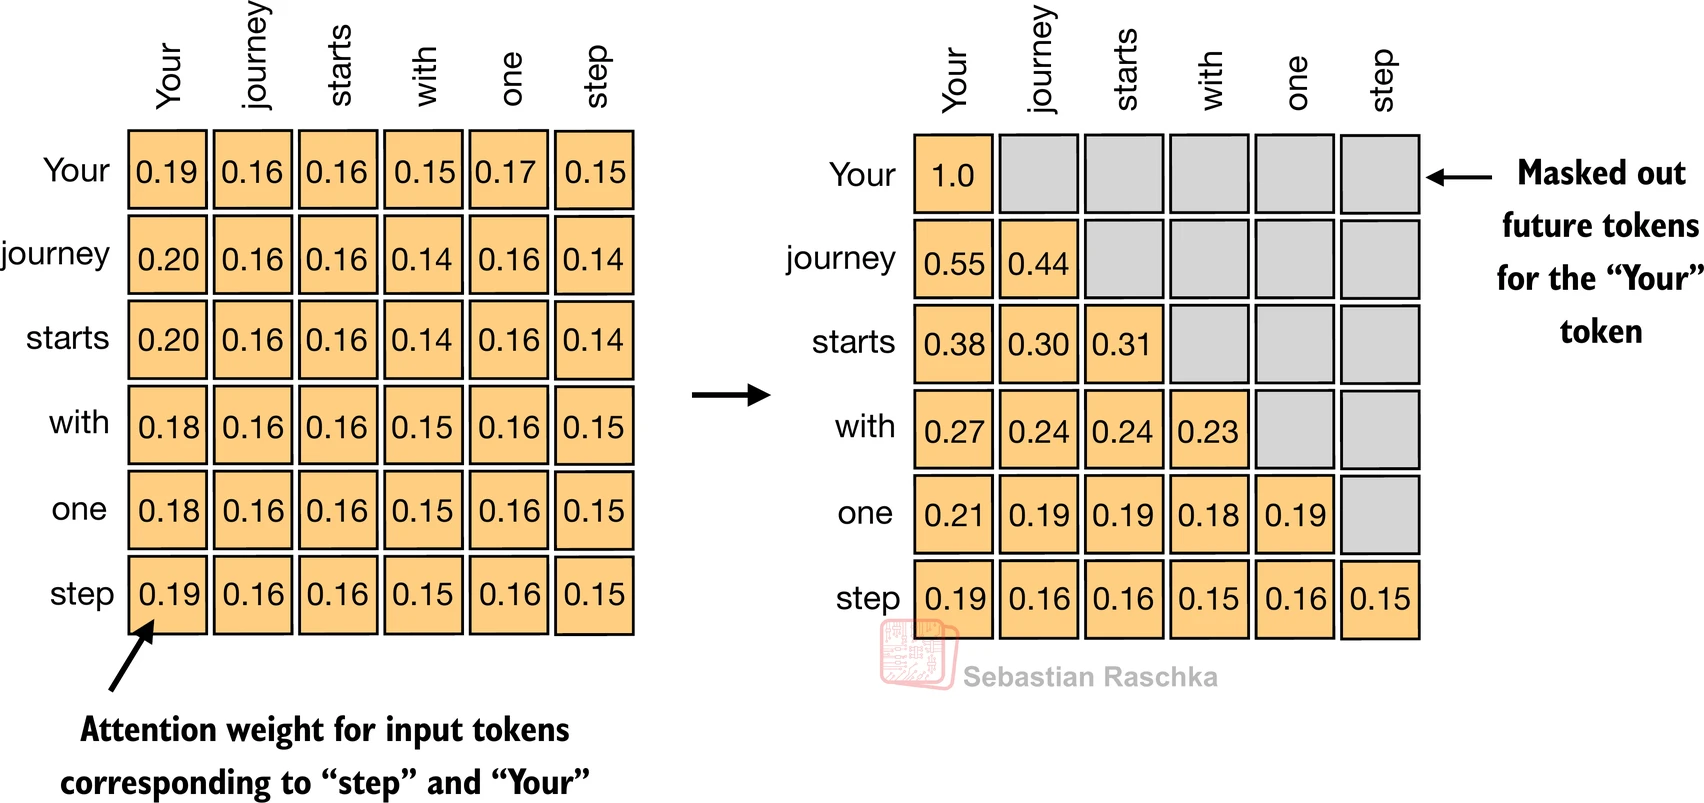

This grid makes sure:
- word 1 cannot see words 2, 3, or 4
- word 2 cannot see words 3 or 4

This is important so the model reads text in the correct order.
Without `context_length`, the model would not know how big this blindfold should be.

---

### Why `context_length` matters

- **Memory use**  
  A larger `context_length` needs more computer memory.
  When the length doubles, the attention grid becomes four times bigger.

- **Remembering long text**  
  A small `context_length` means the model may forget the start of a long paragraph before it reaches the end.
  A larger `context_length` helps the model remember more of the past text.

In [94]:
torch.manual_seed(0)

d_model = 3          # input embedding size
d_k = 2              # query/key/value size
context_length = batch.shape[1]

attention = CausalSelfAttention(d_model, d_k, context_length)

output = attention(batch)

print("Output shape:", output.shape)
print(output)

Output shape: torch.Size([2, 6, 2])
tensor([[[-0.7904,  0.2048],
         [-0.4952,  0.1781],
         [-0.5285,  0.2028],
         [-0.4891,  0.2280],
         [-0.5257,  0.2233],
         [-0.5263,  0.2481]],

        [[-0.7904,  0.2048],
         [-0.4952,  0.1781],
         [-0.5285,  0.2028],
         [-0.4891,  0.2280],
         [-0.5257,  0.2233],
         [-0.5263,  0.2481]]], grad_fn=<UnsafeViewBackward0>)


 ### Multiple single-head attention layers

In [97]:
class MultiHeadAttentionWrapper(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalSelfAttention(d_in, d_out, context_length) 
             for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)


torch.manual_seed(123)

context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(
    d_in, d_out, context_length, 0.0, num_heads=2
)

context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.7076, -0.2581,  0.6810,  0.4624],
         [-0.4505, -0.1248,  0.4389,  0.2858],
         [-0.4755, -0.2194,  0.4508,  0.3678],
         [-0.4517, -0.1074,  0.4413,  0.3108],
         [-0.4822, -0.0943,  0.4701,  0.2977],
         [-0.4769, -0.0975,  0.4665,  0.3094]],

        [[-0.7076, -0.2581,  0.6810,  0.4624],
         [-0.4505, -0.1248,  0.4389,  0.2858],
         [-0.4755, -0.2194,  0.4508,  0.3678],
         [-0.4517, -0.1074,  0.4413,  0.3108],
         [-0.4822, -0.0943,  0.4701,  0.2977],
         [-0.4769, -0.0975,  0.4665,  0.3094]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


In [98]:
## Multihead Attention from weight splits

In [99]:
import torch

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert d_out % num_heads == 0, "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads

        # Linear layers for Q, K, V
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        
        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)
        
        # Causal mask: prevents looking at future tokens
        mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
        self.register_buffer("mask", mask.bool())

    def forward(self, x):
        b, num_tokens, _ = x.shape

        # 1. Project to Q, K, V and split into heads
        # Shape change: (b, tokens, d_out) -> (b, tokens, heads, head_dim) -> (b, heads, tokens, head_dim)
        def transform(linear, data):
            out = linear(data)
            out = out.view(b, num_tokens, self.num_heads, self.head_dim)
            return out.transpose(1, 2)

        queries = transform(self.W_query, x)
        keys    = transform(self.W_key, x)
        values  = transform(self.W_value, x)

        # 2. Scaled Dot-Product Attention
        # Formula: Softmax( (Q @ K^T) / sqrt(d_k) )
        attn_scores = (queries @ keys.transpose(-2, -1)) / (self.head_dim ** 0.5)
        
        # 3. Apply Causal Mask
        mask = self.mask[:num_tokens, :num_tokens]
        attn_scores.masked_fill_(mask, float('-inf'))

        # 4. Weights and Dropout
        attn_weights = torch.softmax(attn_scores, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # 5. Combine heads
        # (b, heads, tokens, head_dim) -> (b, tokens, heads, head_dim) -> (b, tokens, d_out)
        context_vec = (attn_weights @ values).transpose(1, 2).contiguous()
        context_vec = context_vec.view(b, num_tokens, self.d_out)
        
        return self.out_proj(context_vec)